In [97]:
# ! pip install pandas --upgrade pip

In [98]:
# ! pip install pandas==1.5.3

In [2]:
import os 
import pandas as pd 
import numpy as np 
import re
import tqdm 
import matplotlib.pyplot as plt
import pickle

import nltk
from nltk import ngrams
import seaborn as sns

In [3]:
import matplotlib as mpl
import matplotlib.font_manager as fm
from collections import Counter
import sentencepiece as spm

In [4]:
print(pd.__version__)

1.3.3


In [5]:
directory = os.getenv('HOME') + '/aiffel/aiffelthon'

In [6]:
df_train = pd.read_csv(directory + '/train_data_0324.csv')
df_test = pd.read_csv(directory + '/test_data_0324.csv')
# df_test['weight'] = df_test['tok_cat'].apply(lambda x : 14 - x)
# df_test = df_test.loc[df_test['tok_cat'] < 6].sample(n=250, weights = 'weight' ,random_state=6) # validation 시간이 너무 오래 걸림, 250개만 사용

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948219 entries, 0 to 948218
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  948219 non-null  int64 
 1   reg         948219 non-null  object
 2   topic       948219 non-null  object
 3   stdn        948219 non-null  object
 4   dial        948219 non-null  object
 5   eng         948219 non-null  object
dtypes: int64(1), object(5)
memory usage: 43.4+ MB


In [8]:
df_train.head()

Unnamed: 0 reg topic                                   stdn  \
0           0  jd    역사                          생각이 쪼금씩 바뀌더라고   
1           1  jd    가족                어 알겠는가 외국인들이 그래도 잘 적응하고   
2           2  jd    건강               아으 갑자기 예전에 맹장 뜯은 게 생각난다.   
3           3  jd   스타일  보면은 조금 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.   
4           4  jd   먹거리           약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도   

                                     dial  \
0                          생각이 쪼금씩 바뀌드라고    
1                 어 알겄는가 애국인들이 그또 잘 적응하고    
2              아으 갑자기 에전에 맹장 뜯은 게 생각난디야.    
3  보먼은 쫌 품위 있게 나이 들어가야 되겠단 싱각을 참 많이 해요잉.    
4             약간 쫌 약간 맛이 쪼끔 머시기 하긴 한디 그또    

                                                 eng  
0                 I've changed my mind a little bit.  
1    You know what? Foreigners still get used to it.  
2  All of a sudden, I think I've ripped off my ap...  
3  I have a lot of ideas about getting older in a...  
4          It's a little bit of a tastey, but still.

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  125 non-null    int64 
 1   reg         125 non-null    object
 2   topic       125 non-null    object
 3   stdn        125 non-null    object
 4   dial        125 non-null    object
 5   eng         125 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.0+ KB


In [10]:
df_test.head()

Unnamed: 0 reg  topic                                           stdn  \
0       39379  jd   반려동물                          그러니까 그때 친구가 고양이 키우잖애.   
1       53200  jd    드라마                       나 몰라서 한번 물어본 거야 스타트업이 뭐야   
2       74542  jd     건강  그래도 나한테 안 맞으니까 기름이잖아 그게 그러니까는 더 소화를 못시키는 거에요.   
3      723370  jd    자격증                            이렇게 공부를 조금 해볼까 싶거든.   
4       75397  jd  회사/학교    그래서 그냥 죄송하고 좋은 성적 받자 이런 마음으로 했는데 지금 신프도 그러네   

                                         dial  \
0                        긍께 그때 친구가 고양이 키우잖애.    
1                  나 몰라서잉 한번 물어본 거여 스타트업이 뭐여    
2  그또 난테 안 맞은께 기름이잖아 그게 긍까는 더 소화를 못시키는 거에요잉.    
3                         이러게 공부를 쫌 해보까 싶거든.    
4  긍께 그냥 죄송하고 좋은 성적 받자 이런 맴으로 했는디 짐 신프도 그러네이    

                                                 eng  
0                    That's why my friend had a cat.  
1                                  What's a startup?  
2  But it's oil because it doesn't work for me, w...  
3               I wink Ill study a little like this.  
4  So I just wanted to apologize and get good gra...

##### 중복값, 결측치 확인 및 제거 

In [11]:
df_train.duplicated(subset='stdn').sum()

8079

In [12]:
df_train.duplicated(subset='dial').sum()

744

In [13]:
df_train.duplicated(subset='eng').sum()

62201

In [14]:
df_train.drop_duplicates(subset="dial", inplace = True , ignore_index = True ) 

In [15]:
df_train.drop_duplicates(subset="stdn", inplace = True , ignore_index = True ) 

In [16]:
df_train.drop_duplicates(subset="eng", inplace = True , ignore_index = True ) 

In [17]:
df_train.duplicated().sum()

0

In [18]:
df_train.isnull().sum()

Unnamed: 0    0
reg           0
topic         0
stdn          0
dial          0
eng           0
dtype: int64

In [19]:
# check duplicates
print('train duplicated count :' ,df_train.duplicated(subset='dial').sum())
print('test duplicated count :' ,df_test.duplicated(subset='dial').sum())

train duplicated count : 0
test duplicated count : 0


In [20]:
# check for any overlaps in train and test
tr_dial = df_train.dial.values
ts_dial = df_test.dial.values
temp_ = np.concatenate([tr_dial, ts_dial], axis=0)
temp_ = print('overlap count : ',pd.DataFrame(temp_).duplicated().sum())

overlap count :  0


##### 지역별 데이터 분포 

In [21]:
df_train.reg.value_counts()

kw    293070
jj    192667
jd    171056
gs    112938
cc    110551
Name: reg, dtype: int64

In [22]:
df_test.reg.value_counts()

jd    25
jj    25
cc    25
gs    25
kw    25
Name: reg, dtype: int64

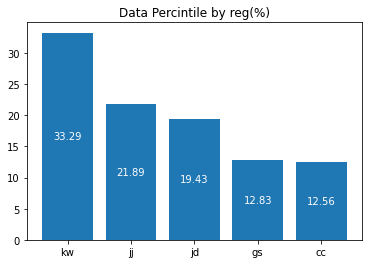

In [23]:
# train data 지역별 데이터 분포 
data = df_train.reg.value_counts(normalize=True).multiply(100).round(2)
fig, ax = plt.subplots()
p = ax.bar(data.index, data)
ax.bar_label(p, label_type='center', color='white')
plt.title("Data Percintile by reg(%)")
plt.show()

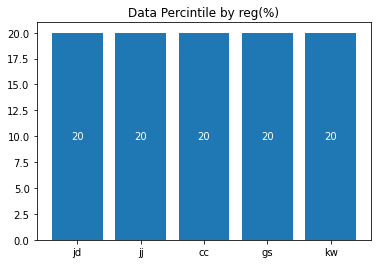

In [24]:
# test 데이터는 굳이 넣을 필요 없을듯합니다.
data = df_test.reg.value_counts(normalize=True).multiply(100).round(2)
fig, ax = plt.subplots()
p = ax.bar(data.index, data)
ax.bar_label(p, label_type='center', color='white')
plt.title("Data Percintile by reg(%)")
plt.show()

### topic별 분포

In [25]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for i in font_list :
    fm.fontManager.addfont(i)
plt.rcParams['font.family'] = 'NanumBarunGothic'

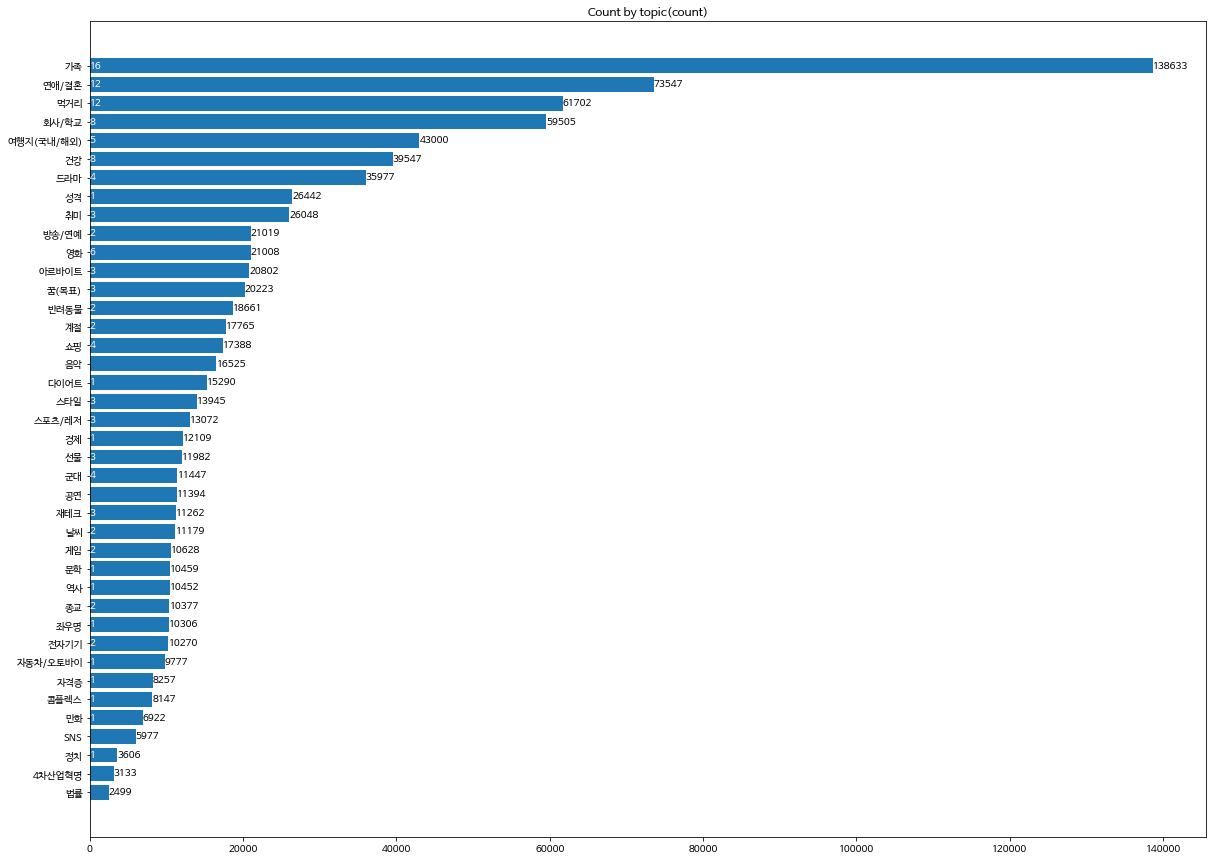

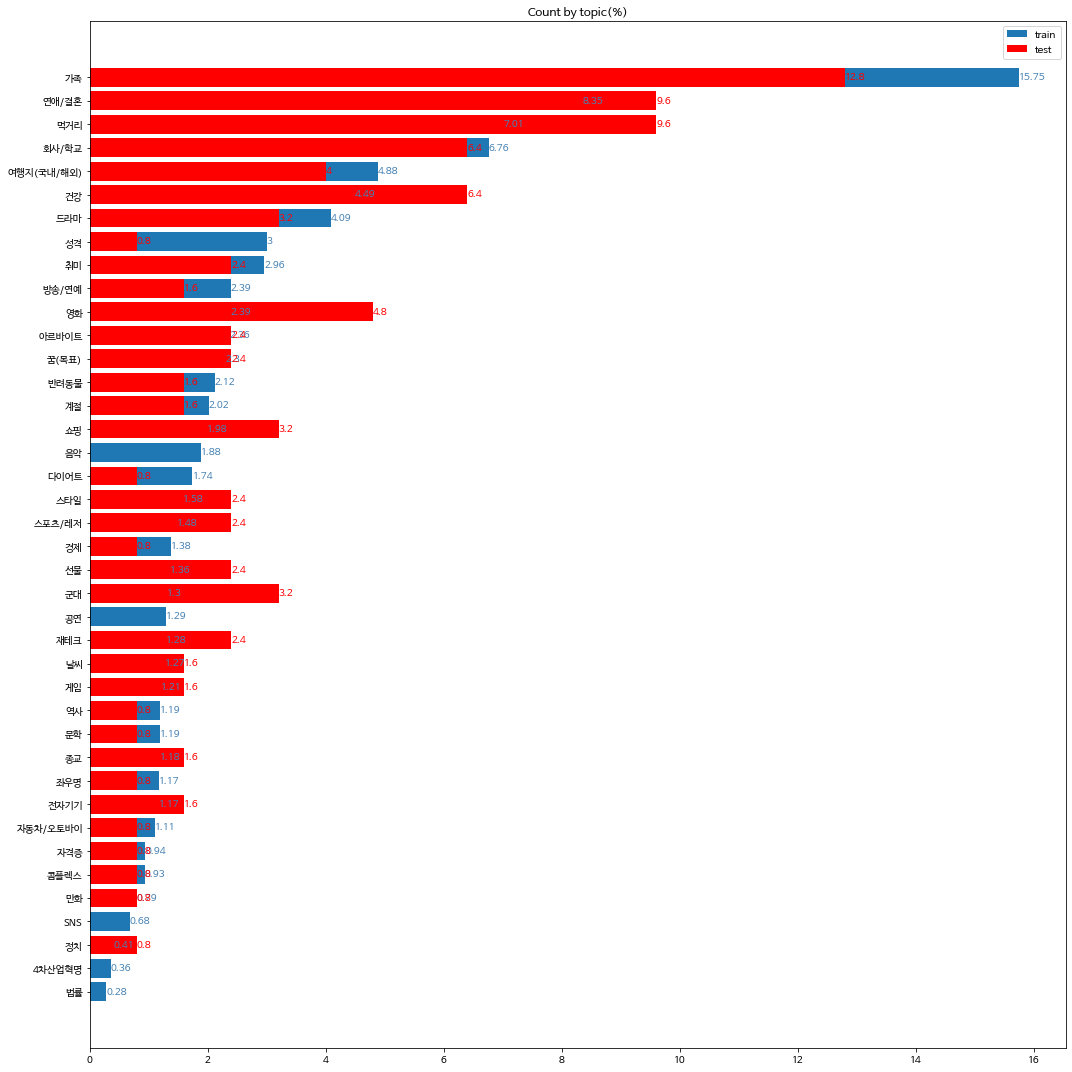

In [26]:
# check by topic
data = df_train.topic.value_counts().sort_values(ascending=True)
data_ts = df_test.topic.value_counts().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(20,15))
p = ax.barh(data.index, data, align='center')
t = ax.barh(data_ts.index, data_ts, align='center', color='red')
ax.bar_label(p, font='NanumBarunGothic')
ax.bar_label(t, color='white', font='NanumBarunGothic')
plt.title("Count by topic(count)")

data = df_train.topic.value_counts(normalize=True).multiply(100).round(2).sort_values(ascending=True)
data_ts = df_test.topic.value_counts(normalize=True).multiply(100).round(2).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(15,15))
p = ax.barh(data.index, data, align='center',label='train')
t = ax.barh(data_ts.index, data_ts, align='center', color='red', label='test')
ax.bar_label(p, color = 'steelblue',font='NanumBarunGothic')
ax.bar_label(t, color='red', font='NanumBarunGothic')
plt.legend()
plt.title("Count by topic(%)")

plt.tight_layout()
plt.show()

In [27]:
regs = df_train.reg.unique()

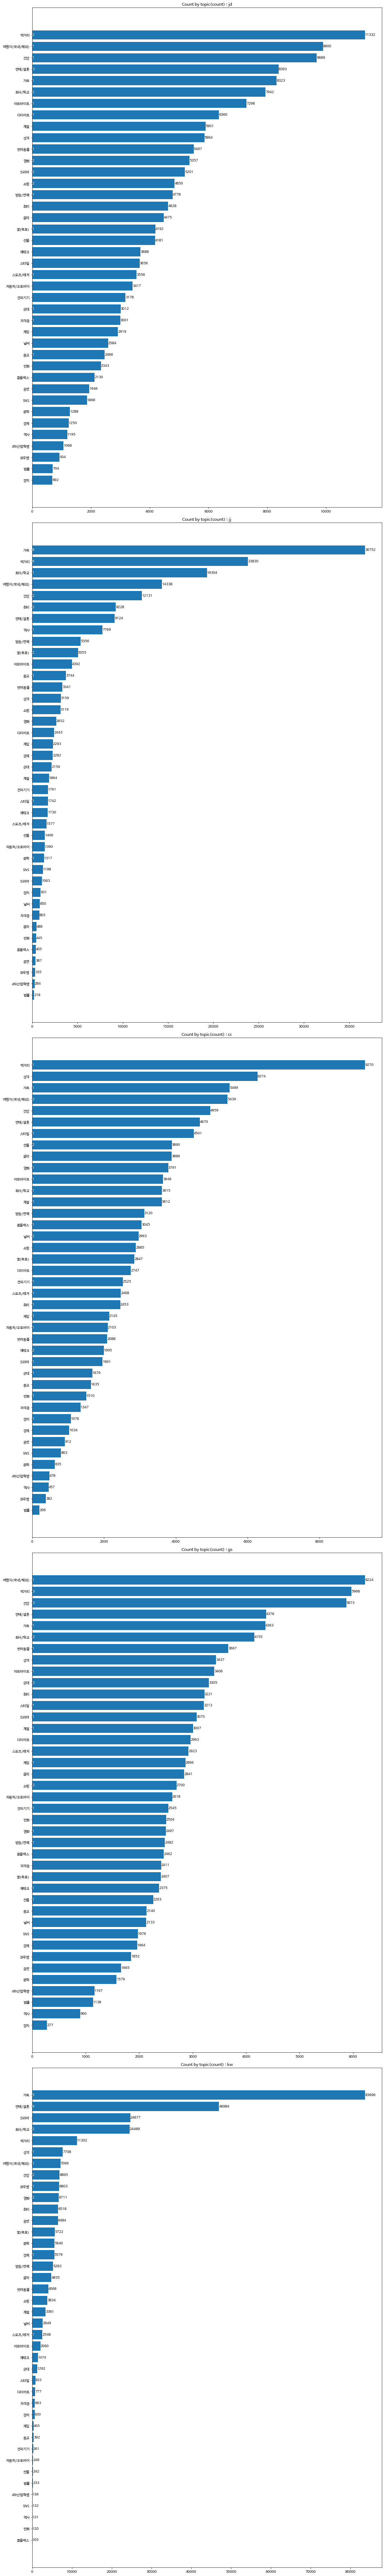

In [28]:
#by region
fig = plt.figure(figsize = (15,100))
for i,reg in enumerate(regs) :
    data = df_train.loc[df_train.reg == reg].topic.value_counts().sort_values(ascending=True)
    data_ts = df_test.loc[df_test.reg == reg].topic.value_counts().sort_values(ascending=True)
    ax = plt.subplot(5,1,i+1)
    p = ax.barh(data.index, data, align='center')
    t = ax.barh(data_ts.index, data_ts, align='center', color='red')
    ax.bar_label(p, font='NanumBarunGothic')
    ax.bar_label(t, color='white', font='NanumBarunGothic')
    plt.title(f"Count by topic(count) : {reg}")
plt.tight_layout()
plt.show()

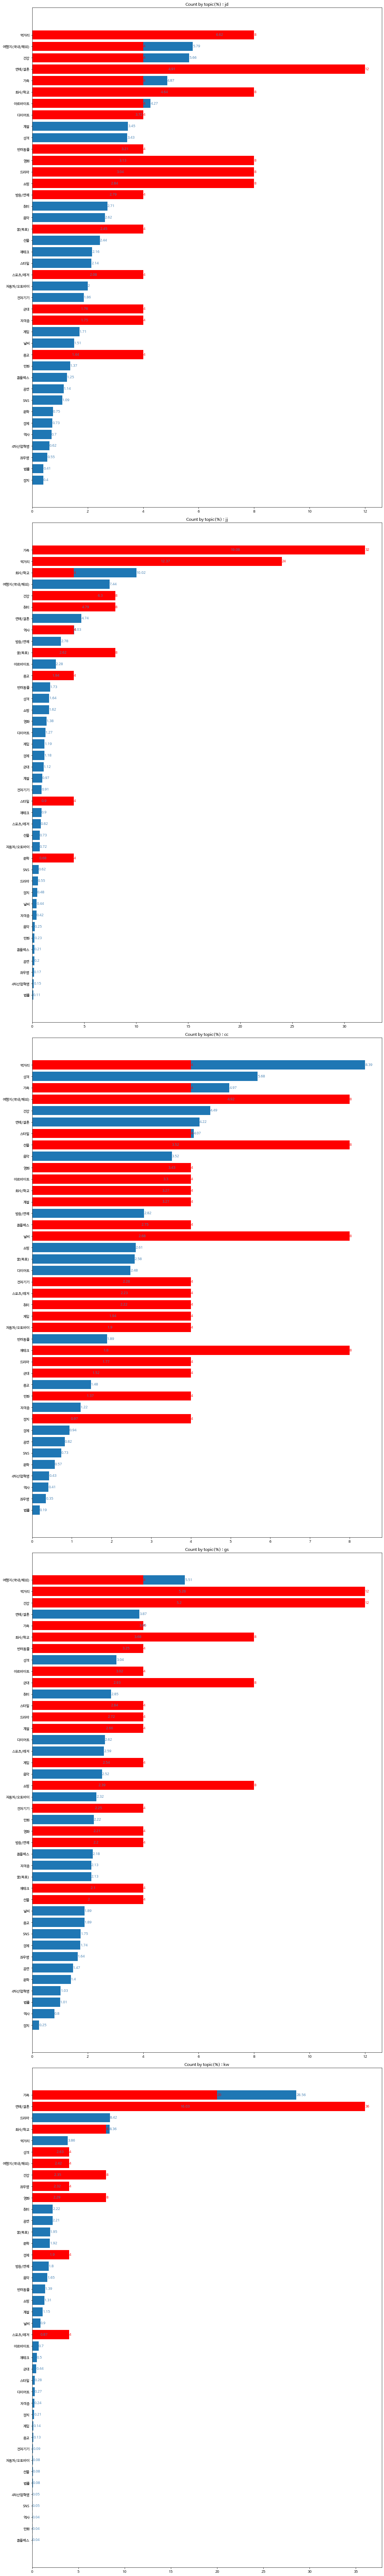

In [29]:
#by region %
fig = plt.figure(figsize = (15,100))
for i,reg in enumerate(regs) :
    data = df_train.loc[df_train.reg == reg].topic.value_counts(normalize=True).multiply(100).round(2).sort_values(ascending=True)
    data_ts = df_test.loc[df_test.reg == reg].topic.value_counts(normalize=True).multiply(100).round(2).sort_values(ascending=True)
    ax = plt.subplot(5,1,i+1)
    p = ax.barh(data.index, data, align='center')
    t = ax.barh(data_ts.index, data_ts, align='center', color='red')
    ax.bar_label(p, color='steelblue',font='NanumBarunGothic')
    ax.bar_label(t, color='red', font='NanumBarunGothic')
    plt.title(f"Count by topic(%) : {reg}")
plt.tight_layout()
plt.show()

### 문장 최대 길이 

In [30]:
# check max, min, ave range in data

def sen_len(corpus, kor=False) :
    max_len = 0
    min_len = 999
    cum_len = 0
    max_content = ''
    min_content = ''
    for i in corpus :
        if kor : 
            i = i[0]
        length = len(i)
        if length >= max_len : 
            max_len = length
            max_content = i
        if length <= min_len : 
            min_len = length
            min_content = i
        cum_len += length
    
    print(f'max_len : {max_len}')
    print('max_content :', max_content)
    print(f'min_len : {min_len}')
    print('min_content :', min_content)
    print(f'average_len : {round(cum_len/len(corpus),1)}')
    
    return max_len, min_len, cum_len

def plot_seq_dist(corpus,kor=False) :
    max_len, min_len , _ = sen_len(corpus,kor)
    seq_len_matrix = np.zeros((max_len+1), dtype=int)
    for i in corpus :
        if kor :
            i = i[0]
        length = len(i)
        seq_len_matrix[length] += 1
    
    fig,ax = plt.subplots()
    hist = ax.bar(range(len(seq_len_matrix)),seq_len_matrix, color='steelblue', width=2)
    plt.title('char_len_distribution')
    plt.show()


max_len : 203
max_content : 잔채집에 따라가고 우리집으는 왜 안하라우. 우리 딸두 빨리 잔채가 열려야지. 사나 복이 있어야지. 사나 복이 없으문 자식 복두 없다던데. 사나 잘 해줘서 손두 안 움직인데. 너는 사나 젊잖아. 우리 사나은 나으가 많아. 기래두 사나 돈을 잘 벌잖아. 나는 착한 사나 최고인 것 같아. 운제 한 번 놀러와. 저 사람 좀 보와. 몸띠이가 크더라. 다리 터리기 많아. 
min_len : 2
min_content : 매 
average_len : 27.5


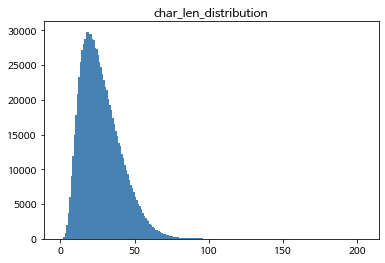

In [31]:
# train : dialect corpus by character
plot_seq_dist(df_train['dial'])

max_len : 576
max_content : Now I'm going to paint you, and then I'm going to do some weaving, and then I'm going to do some painting, and then I'm going to do some weaving, and then I'm going to do some painting, and then I'm going to do some painting, and then I'm going to do some weaving, and then I'm going to do some painting, and then I'm going to do some weaving, and then I'm going to do some weaving, and then I'm going to do some digging, and then I'm going to do some painting, and then I'm going to do some painting, and then I'm going to do some weaving, and then I'm going to do something.
min_len : 1
min_content : I
average_len : 52.5


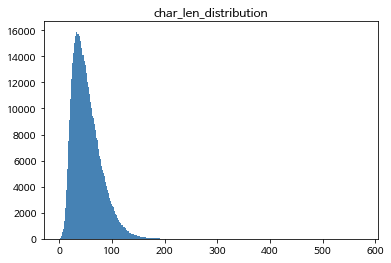

In [32]:
#english
plot_seq_dist(df_train['eng'])

In [33]:
df_train['c_len'] =df_train['dial'].apply(lambda x : len(x))

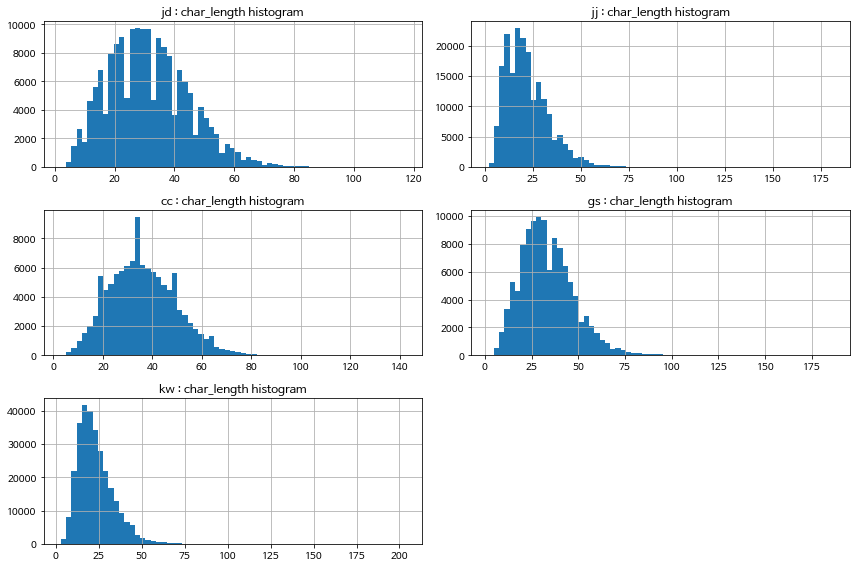

In [34]:
#by reg
plt.figure( figsize=(12,8))
for i, reg in enumerate(regs) :
    plt.subplot(3,2,i+1)
    ax = df_train.loc[df_train['reg'] == reg,'c_len'].hist(bins=65)
    plt.title(f'{reg} : char_length histogram')
plt.tight_layout()
plt.show()

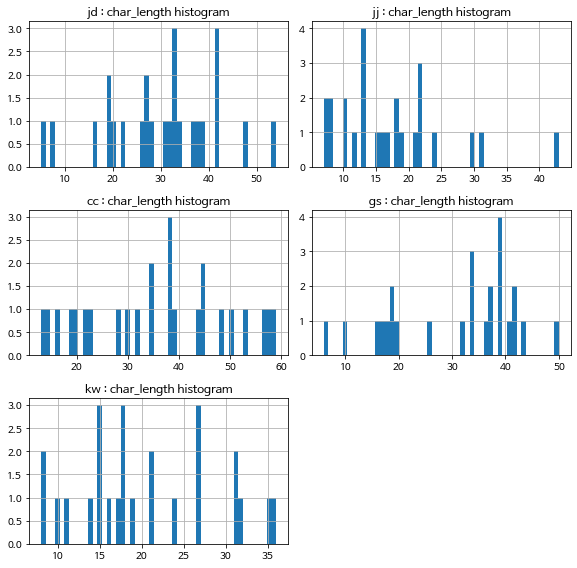

In [35]:
df_test['c_len'] =df_test['dial'].apply(lambda x : len(x))
#by reg
plt.figure( figsize=(8,8))
for i, reg in enumerate(regs) :
    plt.subplot(3,2,i+1)
    ax = df_test.loc[df_test['reg'] == reg,'c_len'].hist(bins=50)
    plt.title(f'{reg} : char_length histogram')
plt.tight_layout()
plt.show()

max_len : 59
max_content : 그서 해군이 있는 대장이 출동을 혀 근데 대장의 그런 전투력은 그냥 루피이 한 천 배 정도 된단 말이여. 
min_len : 5
min_content : 사야제. 
average_len : 26.9


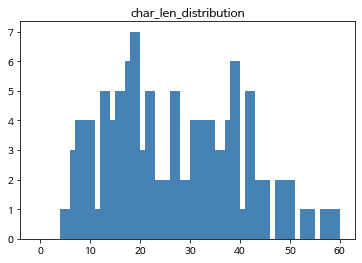

In [36]:
#test
plot_seq_dist(df_test['dial'])

max_len : 130
max_content : I'm just waiting for time to come, and I don't think it's too much time to go to the movies, and I don't want to go to the movies.
min_len : 9
min_content : Oh mix it
average_len : 50.0


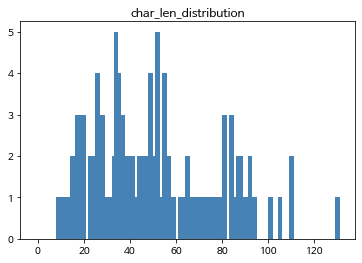

In [37]:
plot_seq_dist(df_test['eng'])

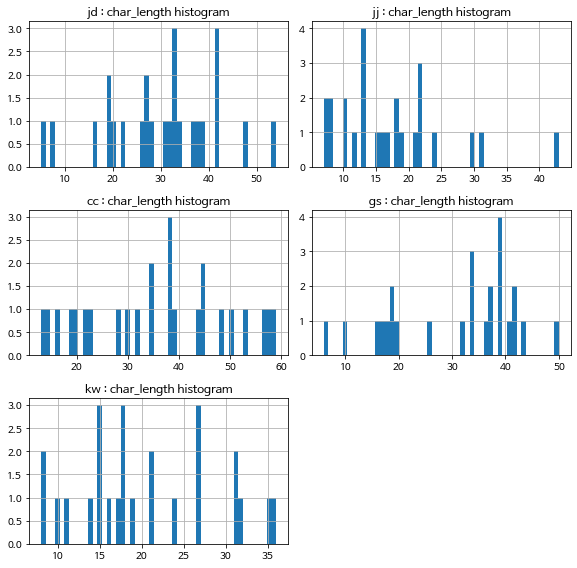

In [38]:
df_test['c_len'] =df_test['dial'].apply(lambda x : len(x))
#by reg
plt.figure( figsize=(8,8))
for i, reg in enumerate(regs) :
    plt.subplot(3,2,i+1)
    ax = df_test.loc[df_test['reg'] == reg,'c_len'].hist(bins=50)
    plt.title(f'{reg} : char_length histogram')
plt.tight_layout()
plt.show()

In [39]:
from konlpy.tag import Mecab
mecab = Mecab()

In [40]:
df_train['token'] = df_train['stdn'].apply(mecab.morphs)
df_train['token_len'] = df_train['token'].apply(len)
df_train['token_dial'] = df_train['dial'].apply(mecab.morphs)
df_train['token_dial_len'] = df_train['token_dial'].apply(len)
df_train['token_eng'] = df_train['eng'].apply(mecab.morphs)
df_train['token_eng_len'] = df_train['token_eng'].apply(len)

In [41]:
df_train.topic.value_counts()

가족            138633
연애/결혼          73547
먹거리            61702
회사/학교          59505
여행지(국내/해외)     43000
건강             39547
드라마            35977
성격             26442
취미             26048
방송/연예          21019
영화             21008
아르바이트          20802
꿈(목표)          20223
반려동물           18661
계절             17765
쇼핑             17388
음악             16525
다이어트           15290
스타일            13945
스포츠/레저         13072
경제             12109
선물             11982
군대             11447
공연             11394
재테크            11262
날씨             11179
게임             10628
문학             10459
역사             10452
종교             10377
좌우명            10306
전자기기           10270
자동차/오토바이        9777
자격증             8257
콤플렉스            8147
만화              6922
SNS             5977
정치              3606
4차산업혁명          3133
법률              2499
Name: topic, dtype: int64

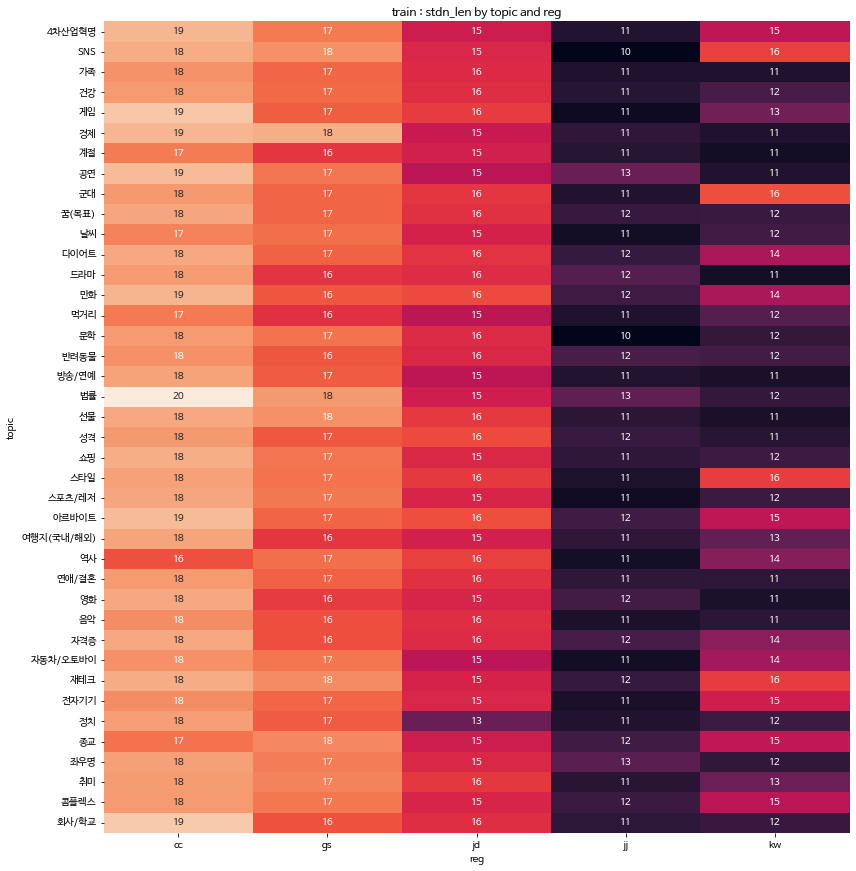

In [42]:
# reg, topic, tok_len 평균

import seaborn as sns
plt.figure(figsize=(12,12))
data = df_train.groupby(['topic','reg'])['token_len'].mean().unstack()
sns.heatmap(data, annot=True,  cbar=False)
plt.tight_layout()
plt.title('train : stdn_len by topic and reg')
plt.show()

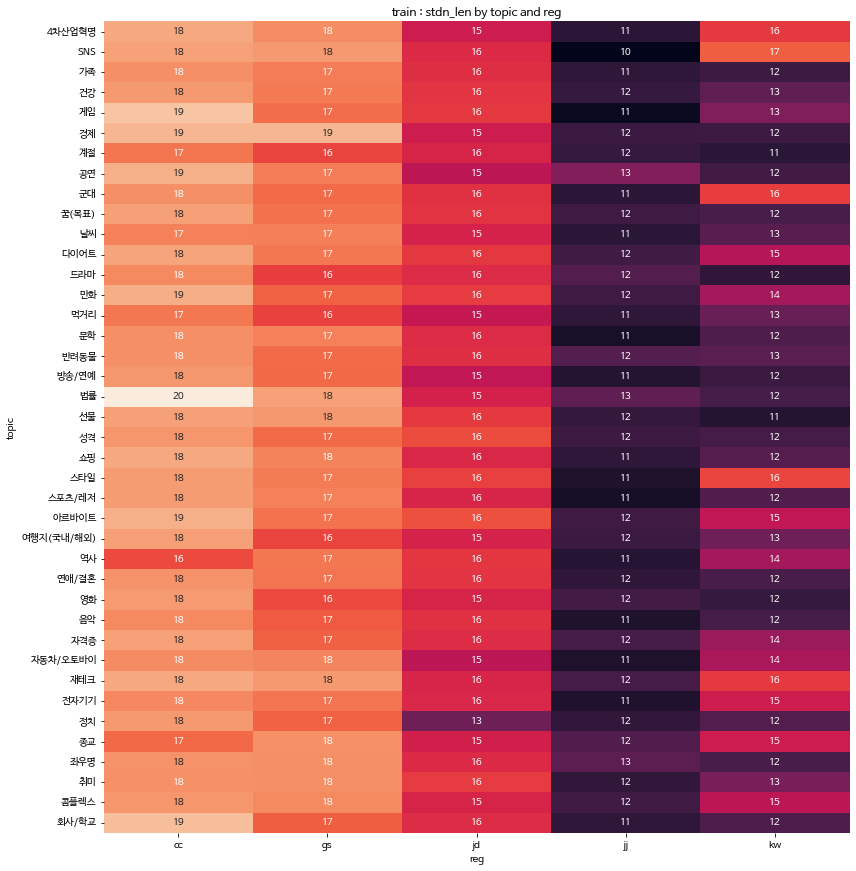

In [43]:
# reg, topic, tok_len 평균

import seaborn as sns
plt.figure(figsize=(12,12))
data = df_train.groupby(['topic','reg'])['token_dial_len'].mean().unstack()
sns.heatmap(data, annot=True,  cbar=False)
plt.tight_layout()
plt.title('train : stdn_len by topic and reg')
plt.show()

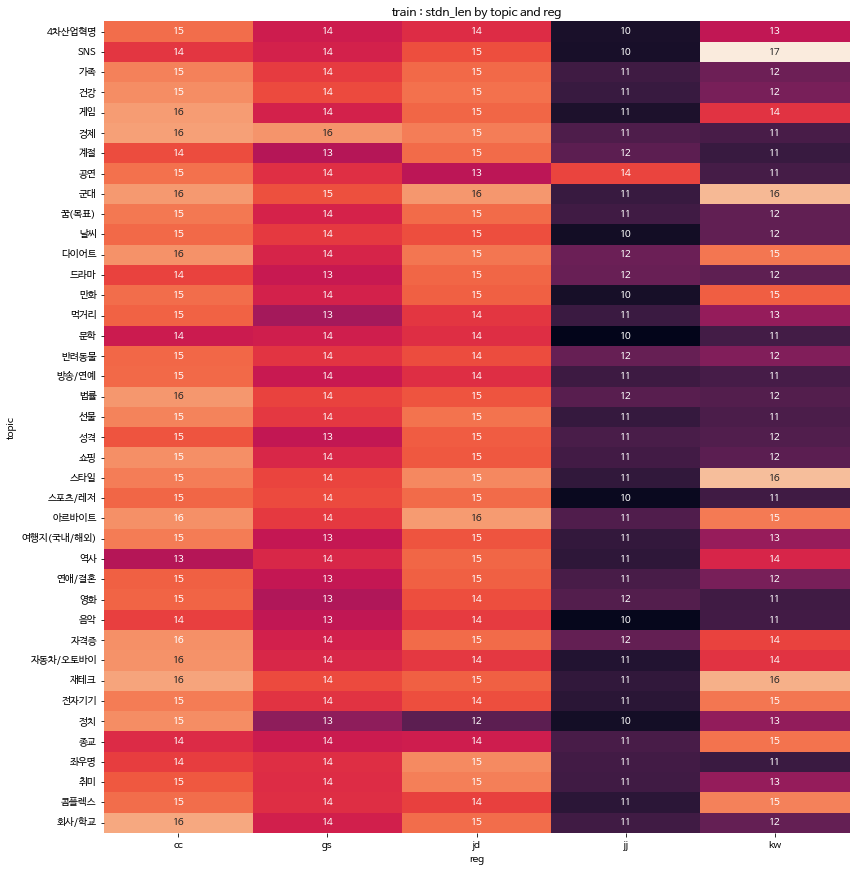

In [44]:
# reg, topic, tok_len 평균

import seaborn as sns
plt.figure(figsize=(12,12))
data = df_train.groupby(['topic','reg'])['token_eng_len'].mean().unstack()
sns.heatmap(data, annot=True,  cbar=False)
plt.tight_layout()
plt.title('train : stdn_len by topic and reg')
plt.show()

### import Tokenizer

In [45]:
data_path = os.getenv('HOME') +'/PocLab/Preprocessing'

spm_8000 = spm.SentencePieceProcessor()
spm_8000.Load(data_path + '/vocab_8000/spm_dec_spm8009.model')

msp_8000 = spm.SentencePieceProcessor()
msp_8000.Load(data_path + '/vocab_8000/spm_dec_msp8009.model')

custom_msp_8000 =  spm.SentencePieceProcessor()
custom_msp_8000.Load(data_path + '/vocab_8000/spm_dec_cmsp8009.model')


True

In [46]:
# 토크나이저 dict 만들기

tokenizers_8000 = {'spm' : spm_8000, 'msp' : msp_8000, 'custom_msp' : custom_msp_8000}

In [47]:
regs = ['kw','jj','cc','gs','jd']

100%|██████████| 171056/171056 [00:04<00:00, 37681.12it/s]


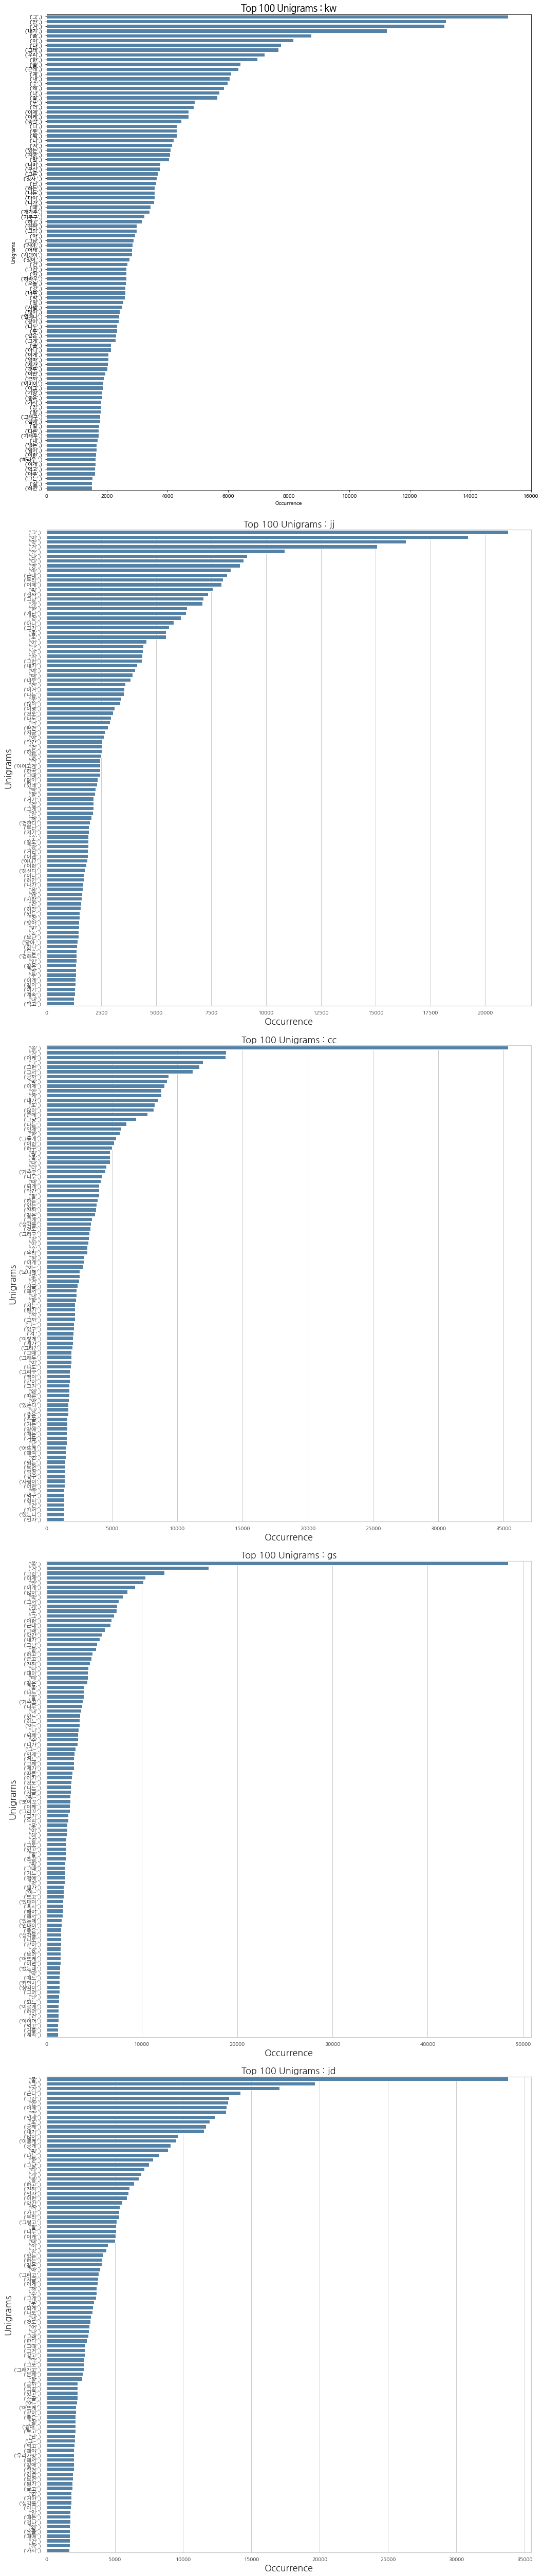

In [48]:
#by reg

fig = plt.figure(figsize=(15,70))

for i, reg in enumerate(regs) :
    
    frequency_pos = Counter()
    dial = df_train.loc[df_train['reg'] == reg,'dial'].values
    for k in tqdm.tqdm(dial) :
        tokenized = ''.join(spm_8000.encode_as_pieces(k)).replace('▁',' ').split()
        token_words = ngrams(tokenized,1)
        frequency_pos.update(token_words)

    df_pos = pd.DataFrame(frequency_pos.most_common(100))

    # Barplot that shows the top most common
    
    plt.subplot(5,1,i+1)
    sns.set(font_scale = 1.5, style = 'whitegrid', font ='NanumGothic')
    sns_pos_1 = sns.barplot(x = df_pos[1], y = df_pos[0], color = 'steelblue')

    # Setting axes labels
    sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Unigrams', title = f'Top 100 Unigrams : {reg}')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    
plt.tight_layout()
plt.show()

## tokenizer별 분산 확인 

In [49]:
dial = df_train.loc[df_train['reg'] == reg,'dial'].values
df_train['dial_r'] = df_train['dial'].apply(lambda x : re.sub('[?.,!]','',x))

In [151]:
# kdeplot 그래프 

import seaborn as sns
from nltk import ngrams
colors = ['r','g','darkviolet','orange','cyan']

def uni_bi_distribution_plot(tokenizer_dic, row, col):
    fig = plt.figure(figsize=(10,10))
    z = 0
    for i, tok in enumerate(tokenizer_dic.items()) :
        key, tokenizer = tok
        for n,reg in enumerate(regs) :
            # unigram
            dial = df_train.loc[df_train['reg'] == reg,'dial_r'].values
            tokenized = []
            for k in tqdm.tqdm(dial) :
                tok_encode = tokenizer.encode(k)
                tokenized.extend(tok_encode)

            # Barplot that shows the top most common

            sns_pos_1 = plt.subplot(row,col,z+i+1)
            sns.set(font_scale = .5, style = 'whitegrid')
            sns_pos_1 = sns.kdeplot(tokenized,color=colors[n], label=reg, fill=True)

            # Setting axes labels
            sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Vocab', title = f'{key} : Unigram Token Distribution by Region')
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=10)
            plt.legend(loc='center', fontsize=12)

        # bigram
        tok_dict = {}
        idx = 0
        for n,reg in enumerate(regs) :
            dial = df_train.loc[df_train['reg'] == reg,'dial_r'].values
            tokenized = []
            for k in tqdm.tqdm(dial) :
                tok_encode = tokenizer.encode(k)
                n_grams = ngrams(tok_encode,2)
                for ng in n_grams :
                    try :
                        tokenized.append(tok_dict[ng])
                    except :
                        idx += 1
                        tok_dict[ng] = idx  
                        tokenized.append(tok_dict[ng])

            sns_pos_1 = plt.subplot(row,col,z+i+2)
            sns.set(font_scale = .5, style = 'whitegrid')
            sns_pos_1 = sns.kdeplot(tokenized,color=colors[n], label=reg, fill=True)
        
        
        # Setting axes labels
        sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Vocab', title = f'{key} : Bigram Token Distribution by Region')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(fontsize=10)
        z +=1
            
        # Trigram
        tok_dict = {}
        idx = 0
        for n,reg in enumerate(regs) :
            dial = df_train.loc[df_train['reg'] == reg,'dial_r'].values
            tokenized = []
            for k in tqdm.tqdm(dial) :
                tok_encode = tokenizer.encode(k)
                n_grams = ngrams(tok_encode,3)
                for ng in n_grams :
                    try :
                        tokenized.append(tok_dict[ng])
                    except :
                        idx += 1
                        tok_dict[ng] = idx  
                        tokenized.append(tok_dict[ng])

            sns_pos_1 = plt.subplot(row,col,z+i+2)
            sns.set(font_scale = .5, style = 'whitegrid')
            sns_pos_1 = sns.kdeplot(tokenized,color=colors[n], label=reg, fill=True)

        # Setting axes labels
        sns_pos_1.set(xlabel = 'Occurrence', ylabel = 'Vocab', title = f'{key} : Trigram Token Distribution by Region')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(fontsize=9)
        z +=1

    plt.tight_layout()
    plt.show()

100%|██████████| 293070/293070 [00:08<00:00, 35603.62it/s]


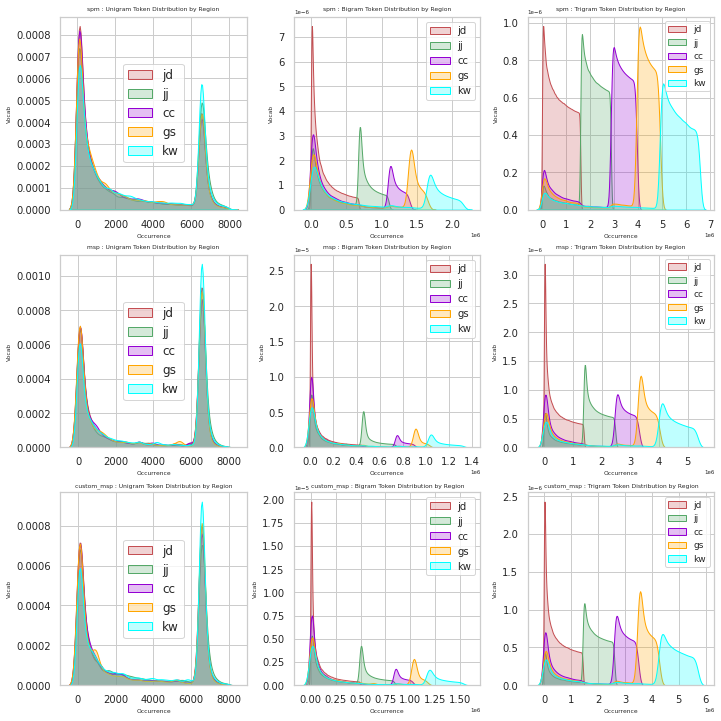

In [153]:
uni_bi_distribution_plot(tokenizers_8000, 3, 3)

## wordcloud

In [50]:
from wordcloud import WordCloud
import matplotlib.font_manager

In [51]:
df_train['token'] = df_train['dial'].apply(mecab.morphs)

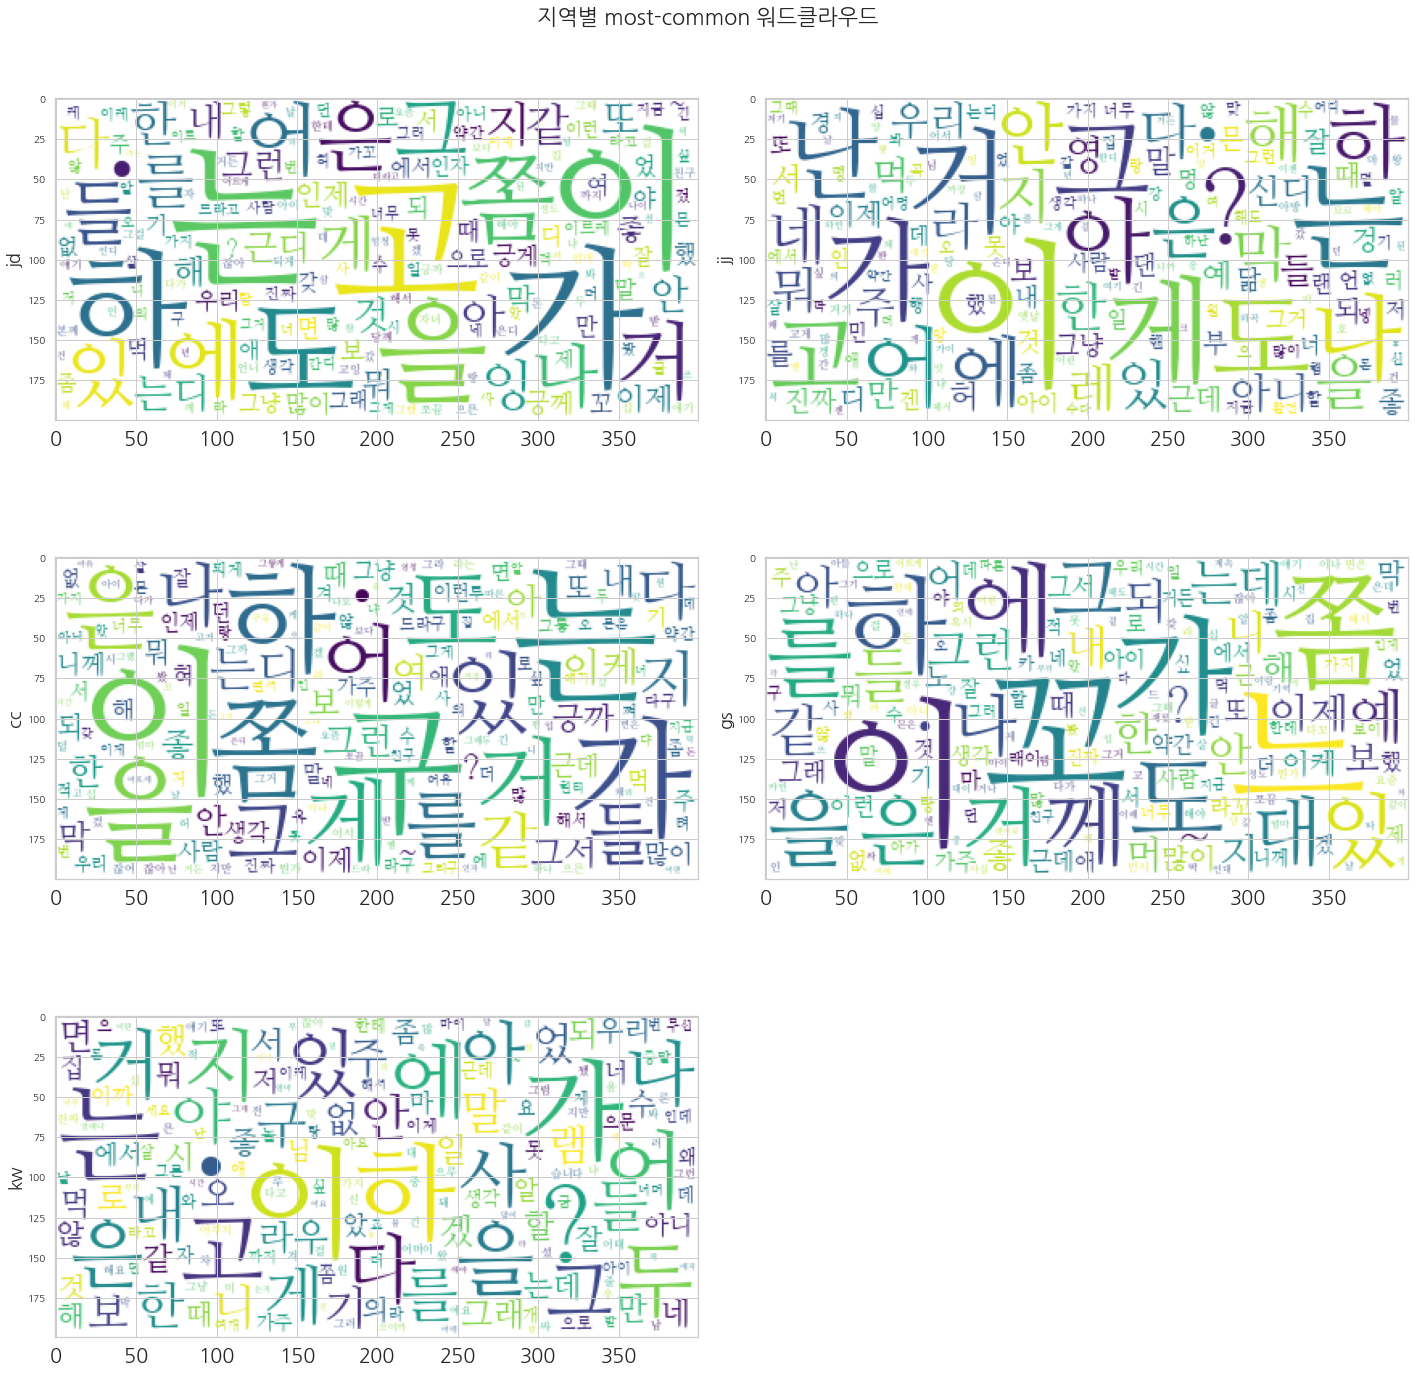

In [75]:
plt.figure(figsize= (20,20))

for i, reg in enumerate(regs) :
    counter = Counter()
    for k in df_train.loc[df_train['reg'] == reg].token :
        counter.update(k)
    
    regs = counter.most_common(100)

    # font path http://corazzon.github.io/matplotlib_font_setting
    font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
    font_list[0][1]
    wc = WordCloud(font_path= font_list[0][1], background_color='white',max_font_size=100 ,prefer_horizontal = 1)
    
    
    cloud = wc.generate_from_frequencies(counter)
    
    plt.subplot(3,2,i+1)
    plt.ylabel(reg)
    plt.imshow(cloud)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=10)

plt.suptitle('지역별 most-common 워드클라우드',  font ='NanumGothic')
plt.tight_layout()
plt.show()

100%|██████████| 293070/293070 [00:02<00:00, 125862.33it/s]


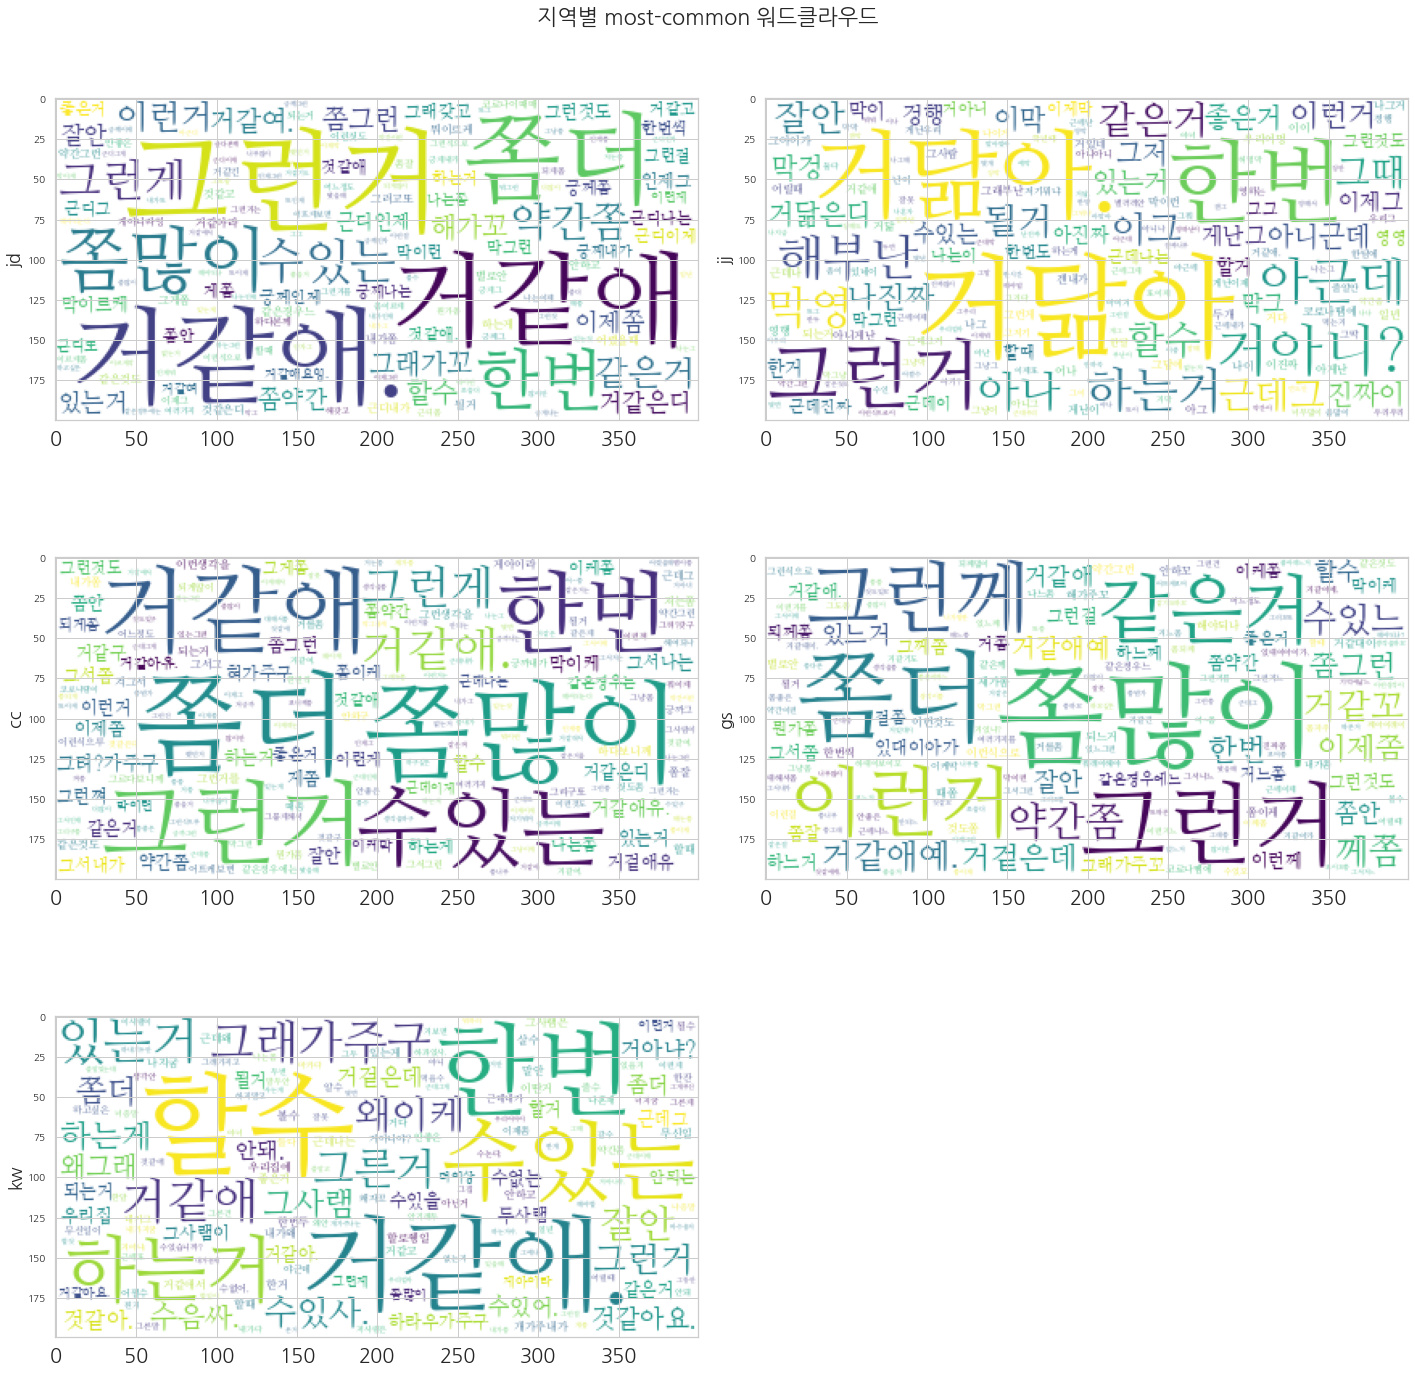

In [74]:
plt.figure(figsize= (20,20))

regs = df_train.reg.unique()

for i, reg in enumerate(regs) :
    frequency_pos = Counter()
    dial = df_train.loc[df_train['reg'] == reg].dial
    for k in tqdm.tqdm(dial) :
        token_words = ngrams(k.split(),2)
        for z in token_words: # 수정
            frequency_pos.update([''.join(z)]) #수정
    
    ccs = frequency_pos.most_common(100) # 수정
        

    # font path http://corazzon.github.io/matplotlib_font_setting
    font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
    font_list[0][1]
    wc = WordCloud(font_path= font_list[0][1], background_color='white',max_font_size=70 ,prefer_horizontal = 1)
    
    
    cloud = wc.generate_from_frequencies(frequency_pos) # 수정

    
    plt.subplot(3,2,i+1)
    plt.ylabel(reg)
    plt.imshow(cloud)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=10)

plt.suptitle('지역별 most-common 워드클라우드',  font ='NanumGothic')
plt.tight_layout()
plt.show()

100%|██████████| 293070/293070 [00:02<00:00, 141309.67it/s]


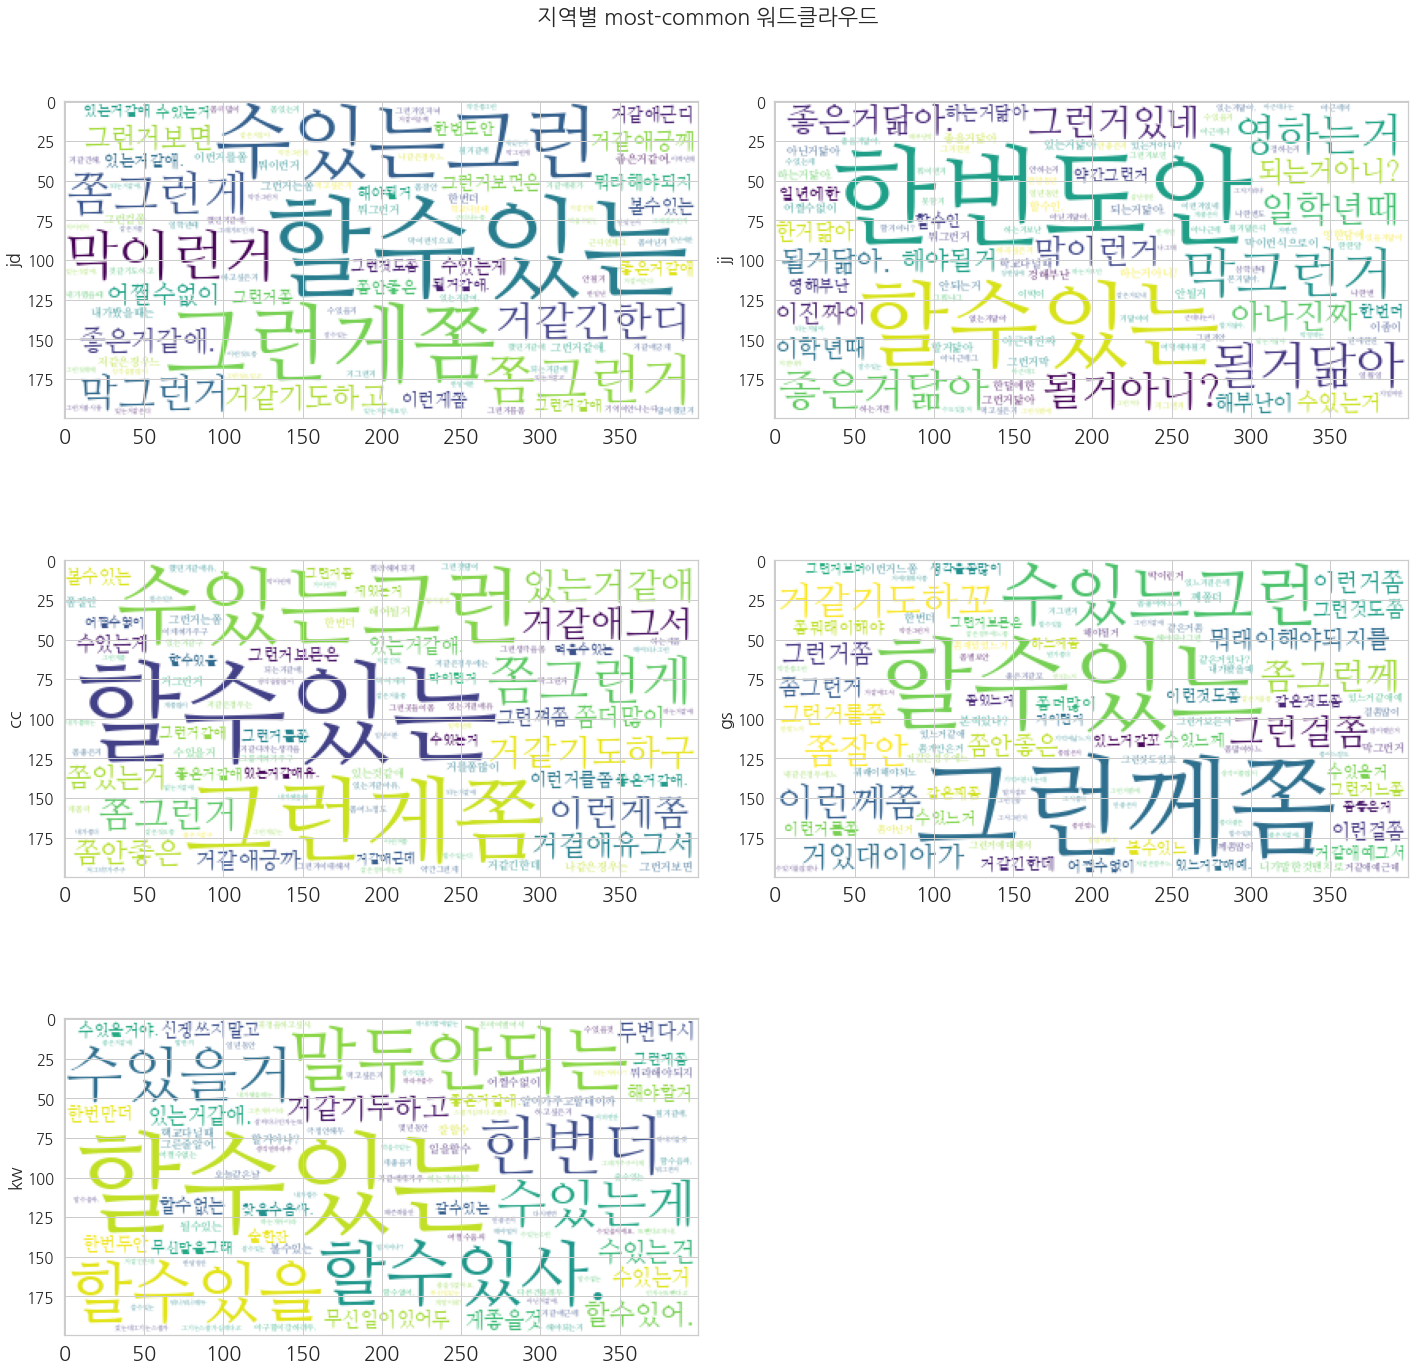

In [73]:
plt.figure(figsize= (20,20))

regs = df_train.reg.unique()

for i, reg in enumerate(regs) :
    frequency_pos = Counter()
    dial = df_train.loc[df_train['reg'] == reg].dial
    for k in tqdm.tqdm(dial) :
        token_words = ngrams(k.split(),3)
        for z in token_words: # 수정
            frequency_pos.update([''.join(z)]) #수정
    
    ccs = frequency_pos.most_common(100) # 수정
        

    # font path http://corazzon.github.io/matplotlib_font_setting
    font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
    font_list[0][1]
    wc = WordCloud(font_path= font_list[0][1], background_color='white',max_font_size=70 ,prefer_horizontal = 1)
    
    
    cloud = wc.generate_from_frequencies(frequency_pos) # 수정

    
    plt.subplot(3,2,i+1)
    plt.ylabel(reg)
    plt.imshow(cloud)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=15)

plt.suptitle('지역별 most-common 워드클라우드',  font ='NanumGothic')
plt.tight_layout()
plt.show()

## 문제점 
- 강원데이터만 한글이 깨져서 나온다. 왜일까? > 수정완료
- wordcloud 잘 나오다가 갑자기 안나오네 ㅎㅎ 이런 > 수정완료 
- 139번코드 y축에 topic이 다 안나온다 > 수정 완료 